In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from unidecode import unidecode
import json
from typing import Dict,List

In [3]:
data_raw=[]
pattern=re.compile(r"https://www\.rottentomatoes\.com/m/([^/]+)")
grade_exception=set()
grade_map = {
    "F-": 0,
    "F": 1,
    "F+": 2,
    "D-": 3,
    "D": 4,
    "D+": 5,
    "C-": 6,
    "C": 7,
    "C+": 8,
    "B-": 9,
    "B": 10,
    "B+": 11,
    "A-": 12,
    "A": 13,
    "A+": 14
}
def parseGrade(grade:str):
    if grade is None:
        return None
    grade=grade.replace(" ","")
    try:
        grade=float(grade)
        max_grade=1
        while(max_grade<grade):
            max_grade*=10
        return grade/max_grade
    except:
        pass
    num_score=re.search(r"(?P<first>(\d+\.*\d*)|(\.\d+))/(?P<second>(\d+\.*\d*)|(\.\d+))",grade)
    if num_score and num_score.group("first") and num_score.group("second"):
        try:
            return float(num_score.group("first"))/float(num_score.group("second"))
        except:
            return grade
    alphabet_score=re.search(r"(\w) *(\+|-)*",grade)
    if alphabet_score and alphabet_score.group(1):
        try:
            submark=alphabet_score.group(2)
        except:
            pass
        if not submark:
            submark=""
        _abcgrade=alphabet_score.group(1).upper()+submark
        if _abcgrade in grade_map:
            return grade_map[_abcgrade]/grade_map["A+"]
    grade_exception.add(grade)
    # print(f"\{grade}\\")
    return grade
with open("review_list","r") as f:
    for line in f:
        movie:Dict=json.loads(line)
        for k,v in movie.items():
            movie=pattern.search(k)
            if movie is not None:
                movie=movie[1]
            for review in v:
                additional:List[str]=[r.strip() for r in review["additional"].split("|")]
                grade,date=None,None
                if len(additional)==3:
                    _grade=re.search(r"Original Score: +(.+)",additional[1]).group(1)
                    grade=parseGrade(_grade)
                    if(grade and type(grade)!= str and grade>1 ):
                        # print("Discard parsed",_grade)
                        grade=_grade
                    date=additional[2]
                elif len(additional)==2:
                    date=additional[1]
                else:
                    raise NotImplemented
                review.update({"date":date,"grade":grade})
                data_raw.append(dict(review,**{"movie":movie}))

In [4]:
print(grade_exception)

{'1-5stars', '3.5.4.0', '2.5.4', '4\\5', '**', 'short', 'low+2outof-4..+4', 'LESSTHANZEROSTARS', '1.5of4', '2stars', 'ReadABook', '+', '*', 'Matinee', '7outof10``', '8.5outof10', 'StronglyNotRecommended', '7.8outof10', '1-5', 'OliviaWildelosesthemakeupthatmadeherthefa', 'ZEROSTARS', 'low+1outof-4..+4', '5.4outof10', '+2outof-4..+4', '+3outof-4..+4', '3outof4Ripples', '80%', '5.5outof10', 'high+1outof-4..+4', '8.7outof10', '4of5', '8.6outof10', '4.5of5', '+1outof-4..+4', '6.5outof10', 'Recommended', '1-5Stars', '3Ripples', '4stars', '2outof10', 'void', '2.5outof10', '2.5stars', "'2.4'", '1\\5', '3of5', "'3'", '2:4', 'ONESTAR', '7.5outof10', '3.5outof10', 'SidSmith', 'TWOSTARS', '-1outof-4..+4', '3.5.5', '4Ripples', 'high+3outof-4..+4', 'HighlyRecommended', '*****', 'low0outof-4..+4', '2.5of5', '1outof5stars', '6outof10', '3outof10', 'Schmoeditup', '4.5outof10', 'HalfPrice', 'G.O.A.T', '2of5', '7outof10', '2.5/', 'Overripe', '****', '9outof10', '7.0outof10', 'NotRecommended', '***', '4ou

In [5]:
df=pd.DataFrame(data_raw)
df

,critic,publication,state,review,additional,date,grade,movie
0,Manori Ravindran,National Post,fresh,There's an honesty and whip smart humour to th...,"Full Review | Original Score: 3/4 | Aug 16, 2013","Aug 16, 2013",0.75,everyday_is_like_sunday
1,Ruth Maramis,FlixChatter Film Blog,rotten,The reunion story set in the ancient Egyptian ...,"Full Review | Original Score: 2.5/5 | Mar 3, 2023","Mar 3, 2023",0.5,luxor
2,Victoria Luxford,City AM,fresh,Luxors thoughtful tone and leisurely pace wont...,"Full Review | Original Score: 4/5 | Feb 26, 2022","Feb 26, 2022",0.8,luxor
3,Sandie Angulo Chen,AWFJ.org,fresh,"Andrea Riseborough is a brilliant actress, and...","Full Review | Jan 10, 2022","Jan 10, 2022",None,luxor
4,Cate Marquis,AWFJ.org,fresh,"...an intriguing reflection amid the ruins, on...","Full Review | Jan 10, 2022","Jan 10, 2022",None,luxor
...,...,...,...,...,...,...,...,...
360796,Louis Proyect,rec.arts.movies.reviews,fresh,"Despite its dire economic circumstances, Roman...","Full Review | Jan 3, 2011","Jan 3, 2011",None,if_i_want_to_whistle_i_whistle
360797,Tim Brayton,Antagony & Ecstasy,rotten,A stilted and frustrating grab-bag of stylisti...,"Full Review | Original Score: 5/10 | Oct 13, 2010","Oct 13, 2010",0.5,if_i_want_to_whistle_i_whistle
360798,Joe Morgenstern,Wall Street Journal,fresh,I was strongly impressed.,"Full Review | Sep 11, 2010","Sep 11, 2010",None,if_i_want_to_whistle_i_whistle
360799,Leslie Felperin,Hollywood Reporter,fresh,The two lead actors... bring nuance and commit...,"Full Review | Sep 18, 2021","Sep 18, 2021",None,what_happened_to_the_wolf


In [6]:
good_grade=df[df["grade"].map(lambda x: x is not None and type(x) is not str and x>0.9)]
false_grade=good_grade[good_grade["state"]=="rotten"]
df.iloc[false_grade.index,df.columns.get_loc("grade")]=None

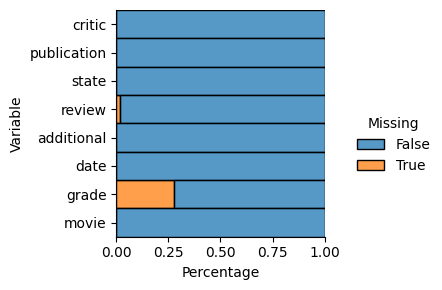

In [7]:
dfview=df.__deepcopy__()
ax=sns.displot(
    data=dfview.map(lambda x: False if x and not pd.isnull(x)  else True).melt(value_name='Missing'),
    y='variable',
    hue='Missing',
    multiple='fill',
    height=3,
    aspect=1.2
)
_=ax.set(xlabel="Percentage",ylabel="Variable")
# specifying a threshold value
# plt.axvline(0.4, color='r')

In [8]:
unique_values=[]
for col in df.columns:
    colunique=df[col].unique()
    col_info={
        "col":col,
        "unique":len(colunique),
        "total": df[df[col].map(lambda x: x is not None and (True if x else False))].shape[0],
    }
    col_info.update({"rounded_repeat_ratio":int(col_info["total"]/col_info["unique"])})
    col_info.update({
        "has_none": df[df[col].map(lambda x: x is None)].shape[0],
        "has_empty_string":df[df[col].map(lambda x: type(x) == str and (False if x else True))].shape[0]
    })
    unique_values.append(col_info)
pd.DataFrame(unique_values)

,col,unique,total,rounded_repeat_ratio,has_none,has_empty_string
0,critic,8807,360801,40,0,0
1,publication,2459,360801,146,0,0
2,state,2,360801,180400,0,0
3,review,344199,353991,1,0,6810
4,additional,122322,360801,2,0,0
5,date,8391,360801,42,0,0
6,grade,458,261535,571,98070,0
7,movie,5002,360801,72,0,0


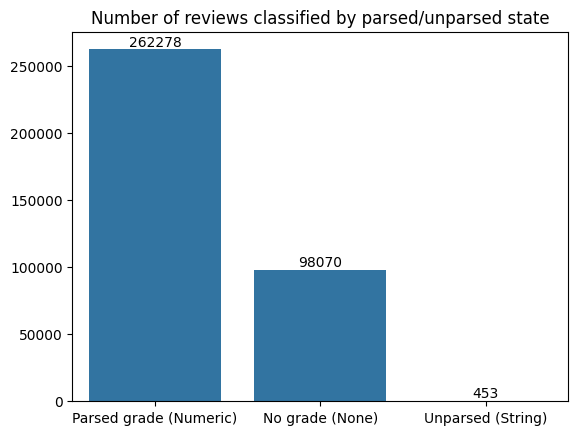

In [9]:
none_grade=df[df["grade"].map(lambda x: x is None)].shape[0]
unparsed_grade=df[df["grade"].map(lambda x: type(x) is str)].shape[0]
# fig=plt.figure(figsize=(10,5))
labels=["Parsed grade (Numeric)","No grade (None)","Unparsed (String)"]
values=[df.shape[0]-none_grade-unparsed_grade,none_grade,unparsed_grade]
ax=sns.barplot(None,x=labels,y=values)
_=ax.bar_label(ax.containers[0])
_=ax.set_title("Number of reviews classified by parsed/unparsed state")
# plt.pie([none_grade,unparsed_grade,df.shape[0]-none_grade-unparsed_grade],labels=["No grade","Unparsed","Has grade"],autopct="%.5f")
# plt.show()

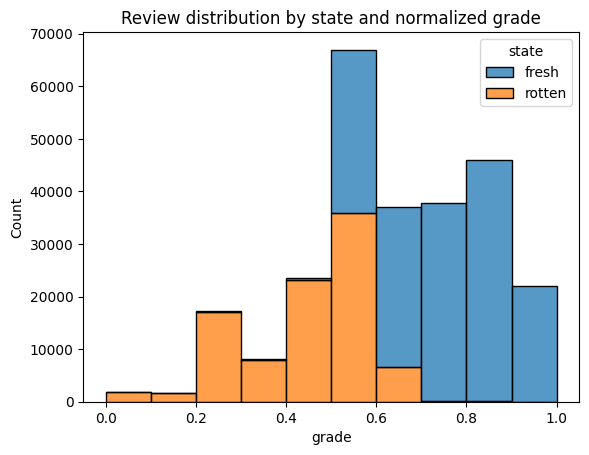

In [10]:
parsedgrade_view=df[~df["grade"].map(lambda x: x is None or type(x) is str)]
# count=parsedgrade_view["grade"].value_counts().reset_index()
ax=sns.histplot(parsedgrade_view,x="grade",hue="state",multiple="stack",bins=10)
_=ax.set_title("Review distribution by state and normalized grade")

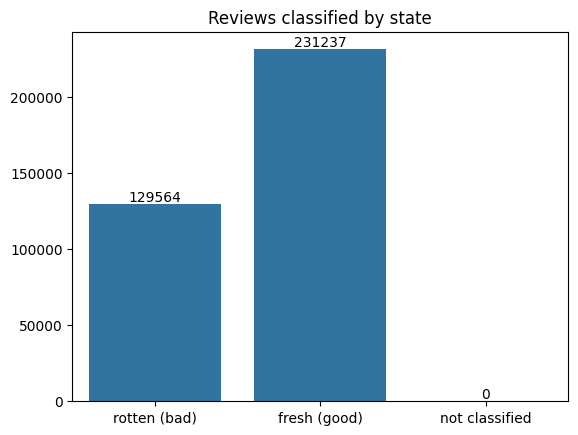

In [11]:
rotten_count=df[df["state"]=="rotten"].shape[0]
fresh_count=df[df["state"]=="fresh"].shape[0]
labels=["rotten (bad)","fresh (good)","not classified"]
values=[rotten_count,fresh_count,df.shape[0]-rotten_count-fresh_count]
ax=sns.barplot(None,x=labels,y=values)
_=ax.bar_label(ax.containers[0])
_=ax.set_title("Reviews classified by state")

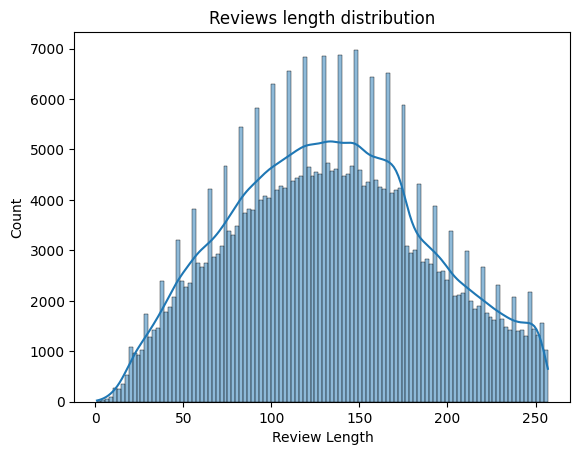

In [12]:
dfview=df.__deepcopy__()
dfview=dfview[dfview["review"].str.len()>0]
dfview["Review Length"]=dfview["review"].str.len()
ax=sns.histplot(dfview, x="Review Length",kde=True)
_=ax.set_title("Reviews length distribution")

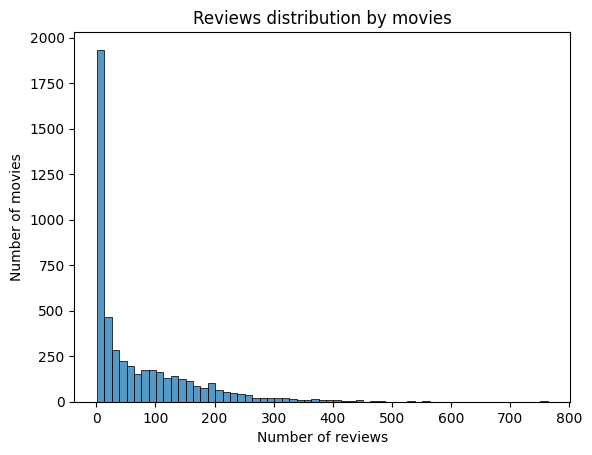

In [13]:
ax=sns.histplot(df["movie"].value_counts().reset_index(), x="count")
_=ax.set_title("Reviews distribution by movies")
_=ax.set(xlabel="Number of reviews",ylabel="Number of movies")

                       critic   state  count
0           5th Freedom Staff   fresh      1
1                   A.A. Dowd   fresh    159
2                   A.A. Dowd  rotten    133
3                   A.C. Koch   fresh      4
4                   A.C. Koch  rotten      1
...                       ...     ...    ...
13546            Álex Manzano   fresh      2
13547  Ángel Fernández-Santos   fresh      2
13548  Ángel Fernández-Santos  rotten      4
13549      Ángel Luis Inurria   fresh      1
13550      Ángel Luis Inurria  rotten      2

[13551 rows x 3 columns]
Reviewers with 3+ positive reviews: 4434
Reviewers with 3+ reviews: 5092
Total 7402


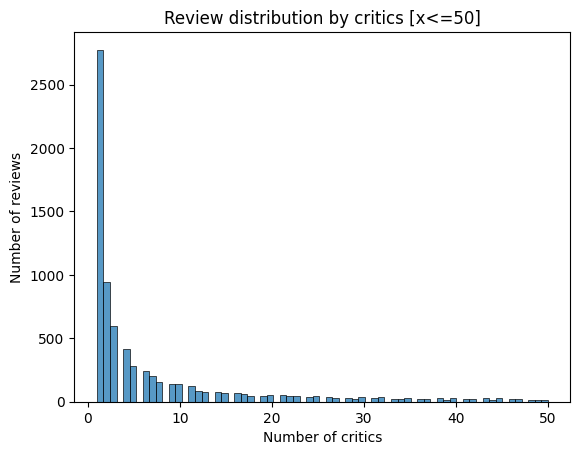

Total 1405


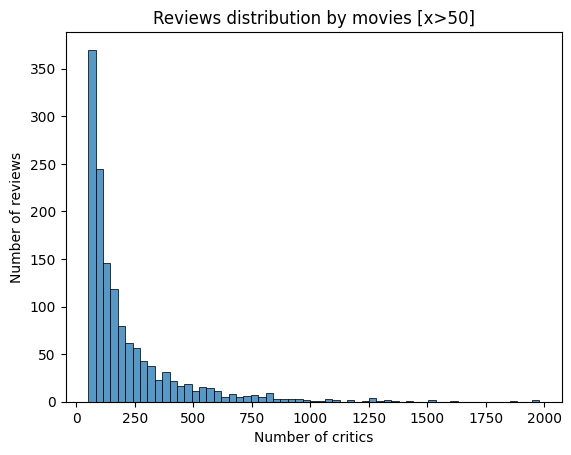

In [14]:
dfview=df.groupby(by=["critic","state"]).size().reset_index(name="count")
print(dfview)
print("Reviewers with 3+ positive reviews:",dfview[(dfview["count"]>=3) & (dfview["state"]=="fresh")].shape[0])
dfview=df["critic"].value_counts().reset_index()
print("Reviewers with 3+ reviews:",dfview[dfview["count"]>=3].shape[0])
sep=50
ax=sns.histplot(dfview[dfview["count"]<=sep], x="count")
_=ax.set_title(f"Review distribution by critics [x<={sep}]")
_=ax.set(xlabel="Number of critics",ylabel="Number of reviews")
print("Total",dfview[dfview["count"]<=sep].shape[0])
plt.show()
ax=sns.histplot(dfview[dfview["count"]>sep], x="count")
_=ax.set_title(f"Reviews distribution by movies [x>{sep}]")
_=ax.set(xlabel="Number of critics",ylabel="Number of reviews")
print("Total",dfview[dfview["count"]>sep].shape[0])
plt.show()

In [15]:
pattern=re.compile(r"https://www\.rottentomatoes\.com/m/([^/]+)")
metadatas=[]
with open("movie_list_enriched","r") as f:
    for line in f:
        meta:Dict=json.loads(line)
        for k,v in meta.items():
            title=pattern.findall(k)
            if not title:
                continue
            title=title[0]
            submeta=v.pop("meta",None)
            temp=dict(v,**{"movie":title})
            if submeta:
                for item in submeta:
                    descriptions=re.findall(r"[^:]+",item)
                    if len(descriptions)>=2:
                        temp.update({descriptions[0]:' '.join(descriptions[1:])})
                    else:
                        print(item)
            metadatas.append(temp)
metadf=pd.DataFrame(metadatas)
metadf

,description,movie,Genre,Original Language,Director,Writer,Runtime,Producer,Release Date (Streaming),Production Co,Aspect Ratio,Rating,Release Date (Theaters),Box Office (Gross USA),Distributor,Sound Mix,View the collection,Release Date (DVD),Rerelease Date (Theaters)
0,"Three Toronto roommates (David Dineen-Porter, ...",everyday_is_like_sunday,"Comedy, Drama",English,Pavan Moondi,"Pavan Moondi, Michael Sloane",1h 30m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,When British aid worker Hana returns to the an...,luxor,"Drama, Romance",English (United Kingdom),Zeina Durra,Zeina Durra,1h 25m,"Zeina Durra, Mohamed Hefzy, Mamdouh Saba","Dec 4, 2020","Film-Clinic, Front Row Filmed Entertainment",Flat (1.85 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,On the way to meet with an independent artist ...,junebug,"Comedy, Drama",English,Phil Morrison,Angus MacLachlan,1h 46m,"Mindy Goldberg, Mike S. Ryan","Jan 8, 2014",Epoch Films,NaN,R (Sexual Content|Language),"Aug 3, 2005 Original",$2.7M,Sony Pictures Classics,NaN,NaN,NaN,NaN
3,Hope (Mimi Kuzyk) must unlock memories from he...,kardia,Drama,English,Su Rynard,NaN,1h 25m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"During Prohibition, loudmouth Harlem grifter R...",life,"Comedy, Drama",English,Ted Demme,"Robert Ramsey, Matthew Stone",1h 48m,"Brian Grazer, Eddie Murphy","Dec 10, 2015","Imagine Entertainment, Universal Pictures",NaN,R,"Apr 16, 1999 Wide",$64.0M,MCA/Universal Pictures [us],"SDDS, Dolby Digital, DTS, Surround",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5173,Gordie Boggs (David Arquette) and Sean Dawkins...,ready_to_rumble,Comedy,English,Brian Robbins,Steven Brill,1h 47m,"Bobby Newmyer, Jeffrey Silver","Jan 1, 2009","Outlaw Productions, Tollin/Robbins Production...",Flat (1.85 1),PG-13 (Crude Humor|Brief Nudity|Language|Sexu...,"Apr 7, 2000 Wide",$12.4M,Warner Bros. Pictures,"Dolby Stereo, DTS, SDDS, Surround, Dolby Digi...",NaN,NaN,NaN
5174,After a friend's (Julianne Moore) child dies w...,map_of_the_world,Drama,English,Scott Elliott,Peter Hedges,2h 5m,"Kathleen Kennedy, Frank Marshall","Dec 6, 2018","First Look International, Overseas Film Group",NaN,R,NaN,$593.6K,NaN,Surround,NaN,NaN,NaN
5175,None,american_swing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5176,A 16-year-old tries to play matchmaker for her...,my_dads_christmas_date,"Holiday, Comedy, Romance",English,Mick Davis,"Toby Torlesse, Brian Marchetti, Jack Marchetti",1h 31m,"Loni Farhi, Alan Latham, Philippe Martinez","Nov 6, 2020","SPI International, Goldfinch Studios, MSR Med...",NaN,NaN,"Nov 6, 2020 Limited",NaN,Gravitas Ventures,NaN,NaN,NaN,NaN


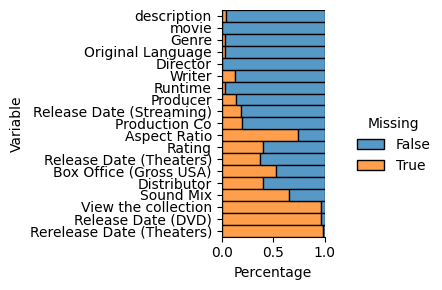

In [16]:
dfview=metadf.__deepcopy__()
ax=sns.displot(
    data=dfview.map(lambda x: False if x and not pd.isnull(x) else True).melt(value_name='Missing'),
    y='variable',
    hue='Missing',
    multiple='fill',
    height=3,
    aspect=1.2,
)
_=ax.set(xlabel="Percentage",ylabel="Variable")

In [17]:
metadf=metadf[["movie","description","Genre","Original Language","Director","Runtime"]]

In [18]:
notseentitle=set()
df_movie=set(df["movie"].unique())
print(len(df_movie))
metadf_movie=set(metadf["movie"].unique())
print(len(df_movie))
for m in df_movie:
    if m not in metadf_movie:
        notseentitle.add(m)
print(len(notseentitle))
notseentitle=set()
for m in metadf_movie:
    if m not in df_movie:
        notseentitle.add(m)
print(len(notseentitle))

5002
5002
0
0


In [19]:
metadf[metadf.duplicated(keep=False)].sort_values(by="movie")

,movie,description,Genre,Original Language,Director,Runtime
3206,1010939-jason_and_the_argonauts,After saving the life of his royal father's us...,"Kids & family, Fantasy",English,Don Chaffey,1h 44m
5127,1010939-jason_and_the_argonauts,After saving the life of his royal father's us...,"Kids & family, Fantasy",English,Don Chaffey,1h 44m
4195,1108389-pearl_harbor,"This sweeping drama, based on real historical ...","War, Drama",English,Michael Bay,3h 3m
5164,1108389-pearl_harbor,"This sweeping drama, based on real historical ...","War, Drama",English,Michael Bay,3h 3m
1832,13_going_on_30,A girl who's sick of the social strictures of ...,"Romance, Comedy, Fantasy",English,Gary Winick,1h 37m
...,...,...,...,...,...,...
3684,why_him,"During the holidays, loving but overprotective...","Holiday, Comedy",English,John Hamburg,1h 51m
5064,willys_wonderland,A quiet loner (Nicolas Cage) finds himself str...,"Horror, Action, Mystery & thriller",English,Kevin Lewis,1h 28m
1687,willys_wonderland,A quiet loner (Nicolas Cage) finds himself str...,"Horror, Action, Mystery & thriller",English,Kevin Lewis,1h 28m
5144,zoolander,Propelled to the top of the fashion world by a...,Comedy,English,Ben Stiller,1h 29m


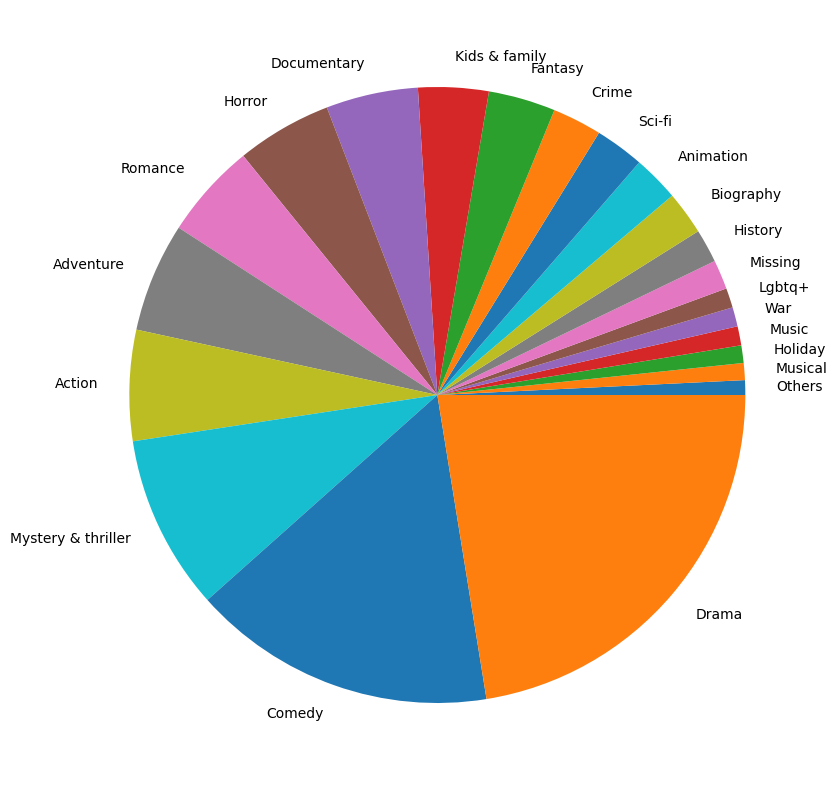

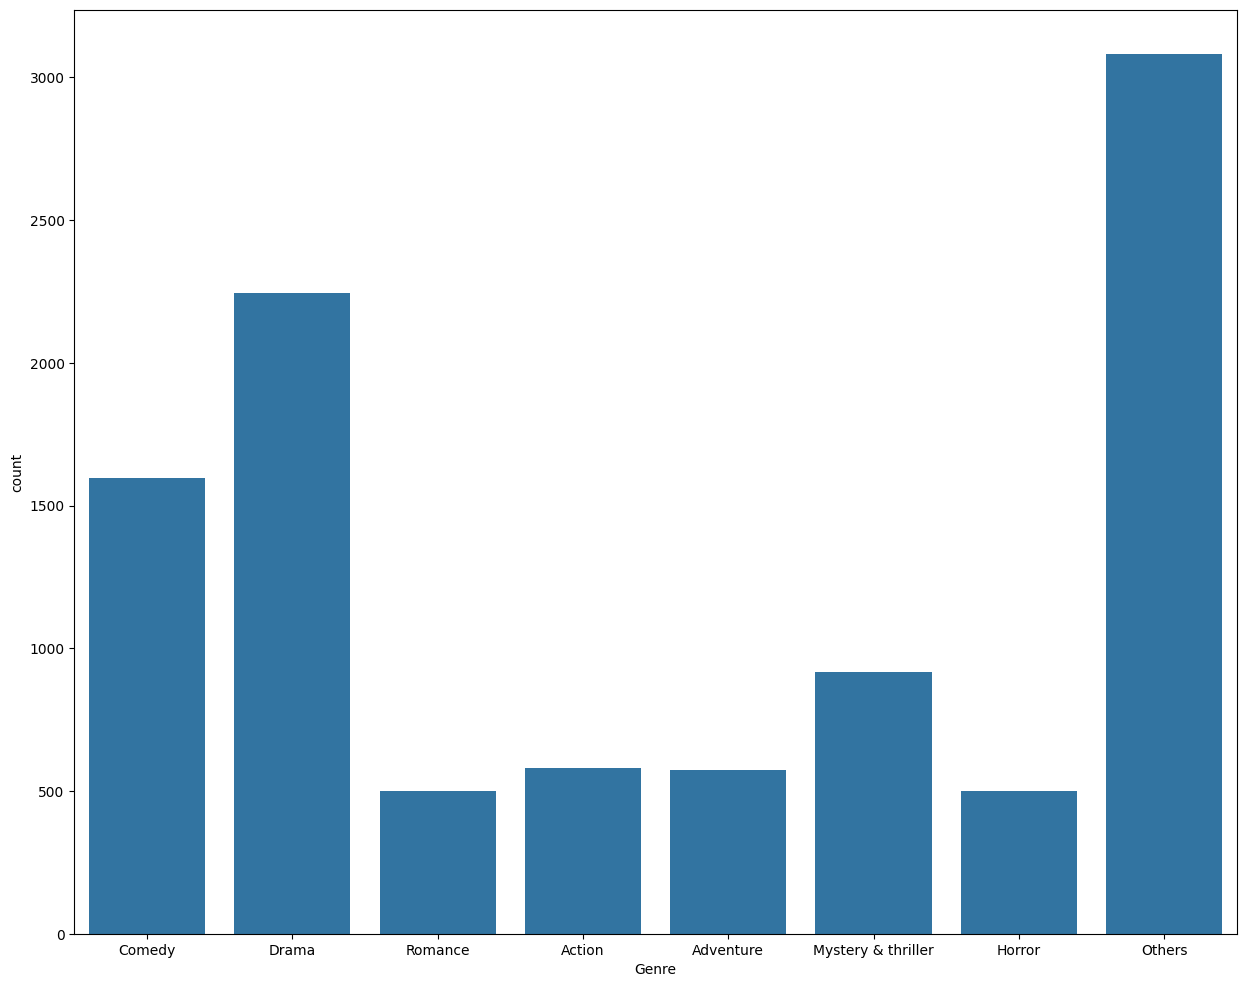

In [20]:
dfview=metadf.__deepcopy__()
gcount={}
for row in dfview.iloc:
    g=row["Genre"]
    if pd.isnull(g):
        genres=["Missing"]
    else:
        genres=list(map(str.strip,g.split(",")))
    for g in genres:
            gcount[g]=gcount.get(g,0)+1
others=0
for k,v in list(gcount.items()):
    if v<80:
        others+=gcount.pop(k,0)     
gcount.update({"Others":others}) 
dfcount=pd.DataFrame(gcount.items(),columns=["Genre","count"]).sort_values(by="count")

plt.figure(figsize=(10,10))
_=plt.pie(x=dfcount["count"],labels=dfcount["Genre"])
plt.show()

gcount={}
for row in dfview.iloc:
    g=row["Genre"]
    if pd.isnull(g):
        genres=["<Missing Value>"]
    else:
        genres=list(map(str.strip,g.split(",")))
    for g in genres:
            gcount[g]=gcount.get(g,0)+1
others=0
for k,v in list(gcount.items()):
    if v<500:
        others+=gcount.pop(k,0)     
gcount.update({"Others":others}) 
dfcount=pd.DataFrame(gcount.items(),columns=["Genre","count"])
plt.figure(figsize=(15,12))
ax=sns.barplot(data=dfcount,x="Genre",y="count")
plt.show()

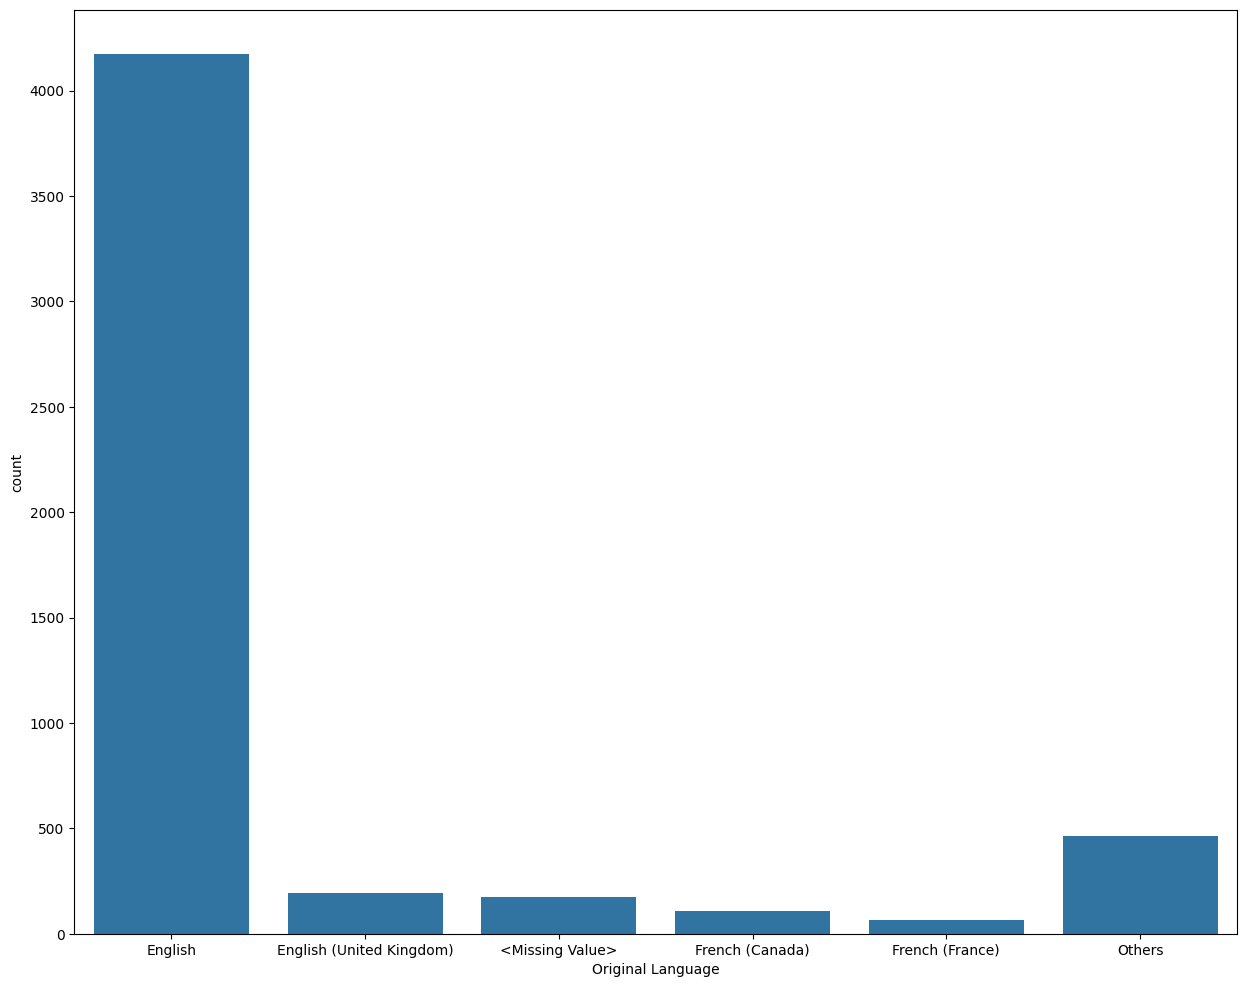

In [21]:
dfview=metadf.__deepcopy__()
gcount={}
for row in dfview.iloc:
    g=row["Original Language"]
    if pd.isnull(g):
        genres=["<Missing Value>"]
    else:
        genres=list(map(str.strip,g.split(",")))
    for g in genres:
            gcount[g]=gcount.get(g,0)+1
others=0
for k,v in list(gcount.items()):
    if v<50:
        others+=gcount.pop(k,0)     
gcount.update({"Others":others}) 
dfcount=pd.DataFrame(gcount.items(),columns=["Original Language","count"])
plt.figure(figsize=(15,12))
ax=sns.barplot(data=dfcount,x="Original Language",y="count")
plt.show()

/tmp/ipykernel_1302029/1554916629.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


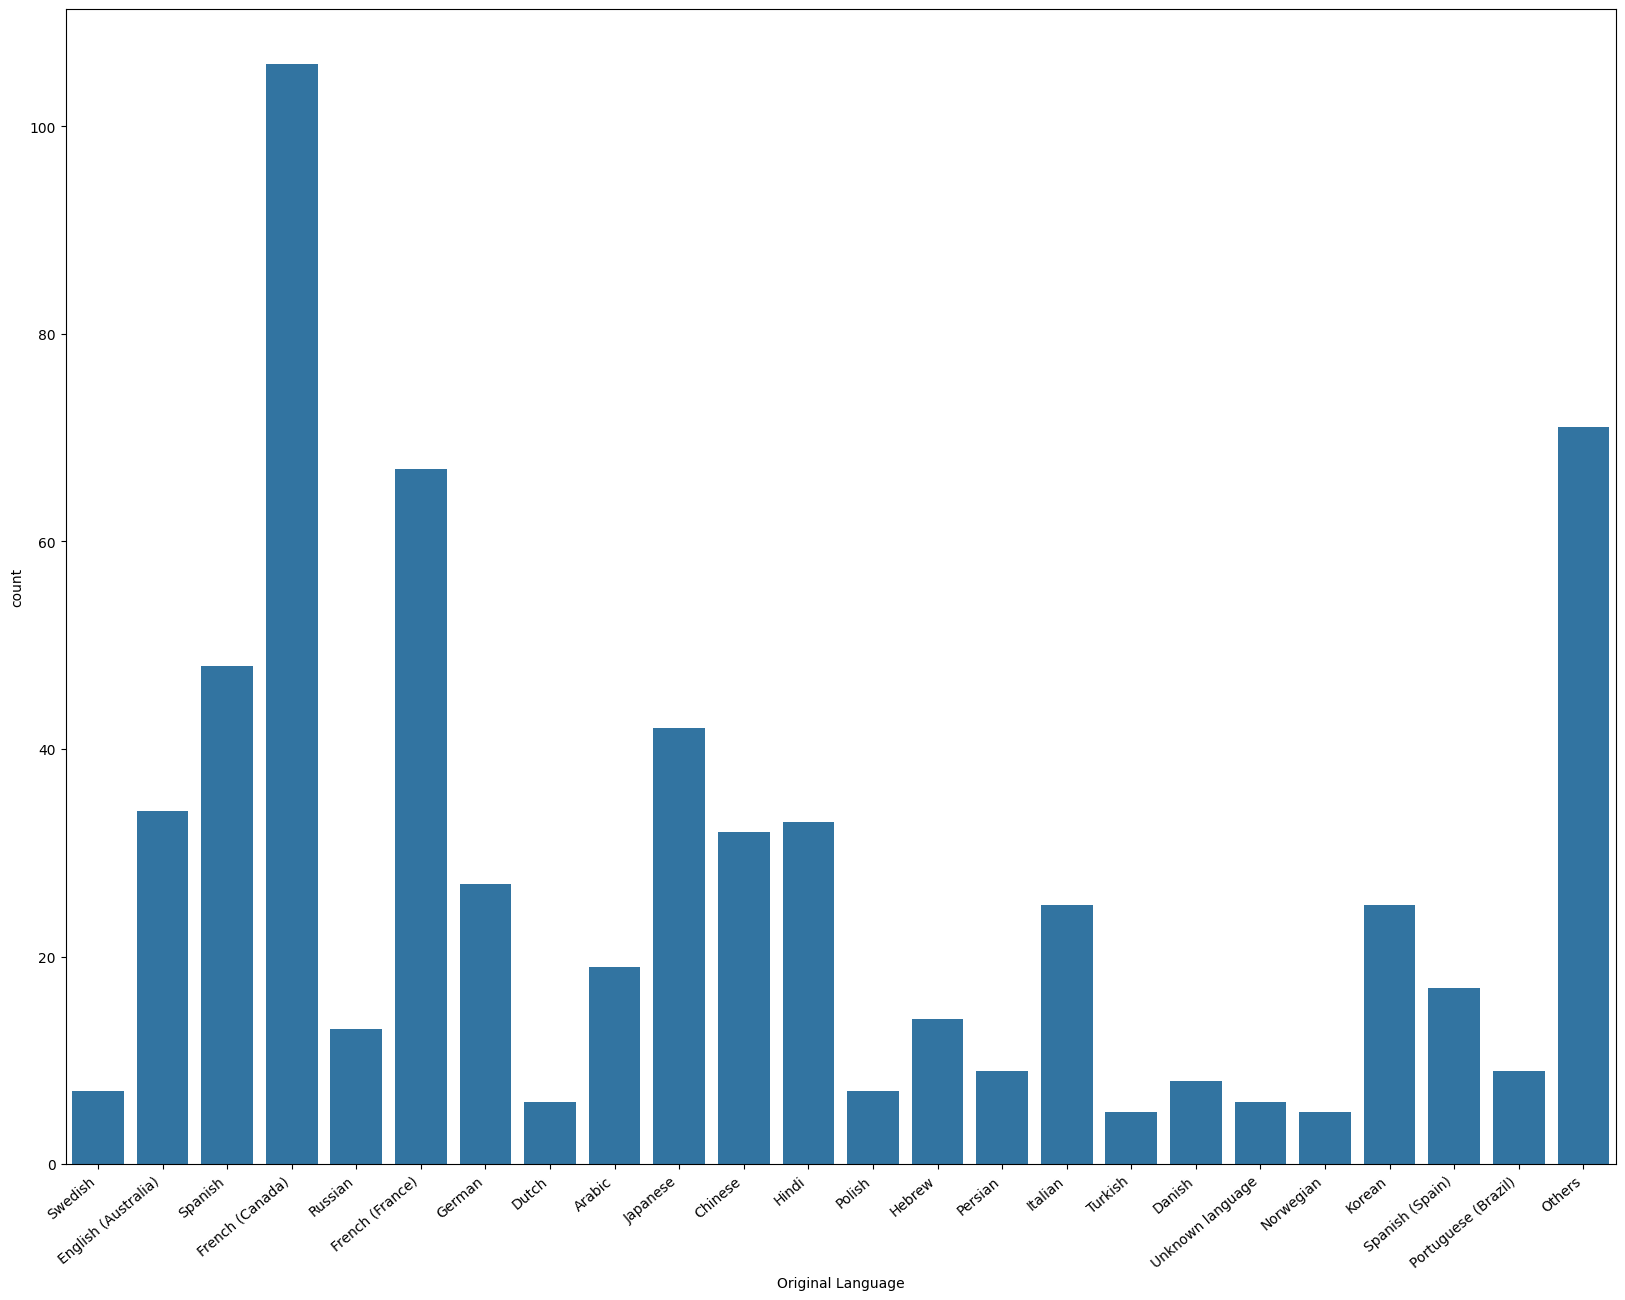

In [22]:
dfview=metadf.__deepcopy__()
gcount={}
for row in dfview.iloc:
    g=row["Original Language"]
    if pd.isnull(g):
        genres=["<Missing Value>"]
    else:
        genres=list(map(str.strip,g.split(",")))
    for g in genres:
            gcount[g]=gcount.get(g,0)+1
others=0
del gcount["English"]
del gcount["English (United Kingdom)"]
del gcount["<Missing Value>"]
for k,v in list(gcount.items()):
    if v<5:
        others+=gcount.pop(k,0)     
gcount.update({"Others":others}) 
dfcount=pd.DataFrame(gcount.items(),columns=["Original Language","count"])
plt.figure(figsize=(20,15))
ax=sns.barplot(data=dfcount,x="Original Language",y="count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

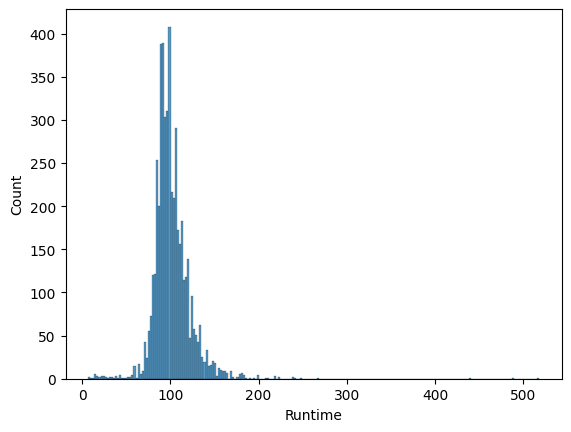

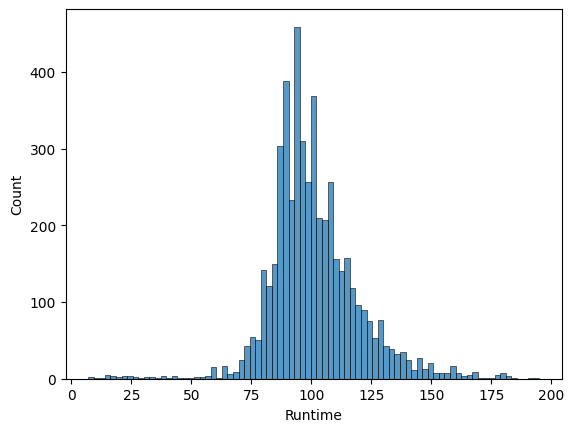

In [23]:
dfview=metadf.__deepcopy__()
def parseTime(x:str):
    nums=list(map(int,re.findall("\d+",x)))
    nums.reverse()
    if len(nums)>2:
        print(x)
        raise Exception
    multifactor=1
    for i in range(len(nums)):
        nums[i]*=multifactor
        multifactor*=60
    result=sum(nums)
    if result==0:
        return None
    return result
dfview["Runtime"]=dfview["Runtime"].astype(str)
dfview["Runtime"]=dfview["Runtime"].map(parseTime)
_=sns.histplot(data=dfview[dfview["Runtime"].notna()],x="Runtime")
plt.show()
_=sns.histplot(data=dfview[(dfview["Runtime"].notna()) & (dfview["Runtime"]<200)],x="Runtime")
plt.show()